# 🏪 Proyecto Aurelion

Este notebook documenta el proceso de **análisis, limpieza y transformación de datos** de la tabla `DETALLE_VENTAS` del proyecto *Aurelion*, utilizando la biblioteca **Pandas** en Python.

El objetivo es preparar un conjunto de datos estructurado, limpio y estandarizado para posteriores procesos de análisis estadístico, modelado o visualización.

## 📊 Descripción General

La tabla `DETALLE_VENTAS` contiene información detallada sobre operaciones comerciales, incluyendo campos de identificación, fechas, montos y categorías de productos.

A lo largo de este notebook se realizarán las siguientes tareas principales:

- Importación de los datos desde un archivo **Excel (.xlsx)**.  
- Creación del dataframe inicial `df_detalle_ventas_c`.  
- Procesamiento, normalización y renombrado de columnas para generar el dataframe limpio `df_detalle_venta`.  
- Aplicación de operaciones básicas de **limpieza**, **transformación** y **estandarización** de los datos.  
- Generación de **estadísticas descriptivas** para comprender la distribución y consistencia de las variables.


## ⚙️ Limpieza y Transformación de los Datos

En esta sección se detallan las operaciones realizadas para asegurar la integridad y coherencia del dataset:

1. **Revisión de valores nulos y duplicados.**  
   - Identificación y tratamiento de valores faltantes.  
   - Eliminación o imputación según el contexto de negocio.

2. **Estandarización de tipos de datos.**  
   - Conversión de fechas, montos y categorías al formato correcto.  
   - Normalización de cadenas y eliminación de espacios o caracteres no deseados.

3. **Renombrado de columnas.**  
   - Aplicación de nombres consistentes y descriptivos conforme a las buenas prácticas de análisis de datos.

4. **Validación del dataframe final.**  
   - Verificación de dimensiones, tipos y contenido.  
   - Comparación con el dataframe original (`df_detalle_ventas_c`).


## 📈 Resultados y Estadísticas Descriptivas

Finalmente, se presentan los principales resultados del proceso de preparación de datos:

- Distribución de valores por variable clave.  
- Identificación de outliers y patrones relevantes.  
- Métricas de tendencia central y dispersión.  
- Estado final del dataframe `df_detalle_venta_True` listo para análisis posteriores.


## 🛠 Instalación e Importación de Librerías.

En esta sección se instalan y cargan las principales bibliotecas de Python utilizadas para el análisis de datos.

- Estas herramientas permiten realizar tareas de manipulación, limpieza, transformación y visualización de la información contenida en el dataset `DETALLE_VENTAS`.


### 🔧 Instalación de librerías

Si el entorno de ejecución no cuenta con las dependencias necesarias, pueden instalarse con los siguientes comandos:

- %pip install pandas numpy scikit-learn category_encoders matplotlib seaborn
- %pip install openpyxl


In [195]:
# Instalar dependencias principales para procesamiento y visualización
%pip install pandas numpy scikit-learn category_encoders matplotlib seaborn scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [196]:
# Asegura el motor openpyxl para leer archivos Excel
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importamos librerias instaladas para implementarlas en el código

In [197]:
# Importa librerías de ETL, codificación categórica y visualización
import pandas as pd
import numpy as np
import sklearn as sk
import category_encoders as ce
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

## 📥 Carga del Archivo de Datos

En esta sección se realiza la **importación del dataset principal** utilizando una **ruta relativa** y la librería `pathlib.Path`. Esto no solo simplifica la ruta, sino que también garantiza que el código sea **portable** y funcione correctamente en diferentes sistemas operativos (Windows, macOS, Linux), siempre y cuando la estructura de directorios se mantenga consistente.

> 📂 **Ruta del archivo:**  
> El archivo se accede mediante la construcción **`Path('db') / 'detalle_ventas.xlsx'`**.

La lectura del archivo se efectúa mediante la función `pd.read_excel()` de la biblioteca **pandas**, creando el dataframe inicial `df_detalle_ventas_c`, el cual servirá como base para los procesos posteriores de limpieza y análisis.


In [198]:
# Carga el detalle de ventas con Path para mantener rutas relativas portables
path_dataset = Path('db') / 'detalle_ventas.xlsx'
df_detalle_ventas_c = pd.read_excel(path_dataset)

### 🔍 Inspección Inicial del Dataset

En esta etapa se realiza una **inspección exploratoria básica** del DataFrame `df_detalle_ventas_c` recién cargado, con el objetivo de verificar que los datos se hayan importado correctamente y posean la estructura esperada.

Para ello, se utilizan las funciones:

In [199]:
# Amplía la inspección a 8 filas para descubrir valores atípicos iniciales
df_detalle_ventas_c.head(8)


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345
3,2,70,Fernet 750ml,2,4061,8122
4,2,22,Medialunas de Manteca,1,2069,2069
5,2,79,Hamburguesas Congeladas x4,4,2420,9680
6,3,9,Yerba Mate Suave 1kg,2,3878,7756
7,3,2,Pepsi 1.5L,2,4973,9946


In [200]:
# Revisa el cierre del dataset con las últimas 4 filas
df_detalle_ventas_c.tail(4)


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
339,118,93,Cepillo de Dientes,3,2142,6426
340,118,50,Azúcar 1kg,2,727,1454
341,119,45,Fideos Spaghetti 500g,5,745,3725
342,120,20,Pan Lactal Blanco,5,1571,7855


In [201]:
# Resumen detallado de df_detalle_ventas_c basado en .describe(include="all")
import numpy as np
import pandas as pd

df = df_detalle_ventas_c

def clasificar_asimetria(skew):
    if pd.isna(skew):
        return 'No disponible'
    if abs(skew) < 0.05:
        return 'Simétrica'
    elif skew > 0:
        return 'Asimétrica positiva'
    else:
        return 'Asimétrica negativa'

def clasificar_curtosis(kurt):
    if pd.isna(kurt):
        return 'No disponible'
    if kurt < -0.5:
        return 'Platicúrtica (cola ligera)'
    elif kurt > 0.5:
        return 'Leptocúrtica (cola pesada)'
    else:
        return 'Mesocúrtica (similar a normal)'

def clasificar_moda(n_modas):
    if n_modas == 0:
        return 'Sin moda'
    elif n_modas == 1:
        return 'Unimodal'
    elif n_modas == 2:
        return 'Bimodal'
    else:
        return 'Multimodal'

print('=' * 90)
print('RESUMEN DETALLADO: df_detalle_ventas_c')
print('=' * 90)
print(f'Tamaño del dataframe: {df.shape[0]:,} filas x {df.shape[1]:,} columnas')
print(f'Memoria (approx): {df.memory_usage(deep=True).sum()/1024**2:.2f} MB')

for col in df.columns:
    s = df[col]
    n_total = len(s)
    n_no_nulos = s.notna().sum()
    n_nulos = s.isna().sum()
    pct_nulos = n_nulos / n_total * 100 if n_total > 0 else 0

    print('\n' + '=' * 90)
    print(f"Columna: {col:30s} | dtype: {str(s.dtype):15s}")
    print('-' * 90)
    print(f'  Total filas                : {n_total:,}')
    print(f'  Valores no nulos           : {n_no_nulos:,} ({n_no_nulos/n_total*100:5.2f}%)')
    print(f'  Valores nulos              : {n_nulos:,} ({pct_nulos:5.2f}%)')

    # NUMÉRICAS
    if pd.api.types.is_numeric_dtype(s):
        serie = s.dropna()
        if serie.empty:
            print('  * Columna numérica sin datos válidos.')
            continue

        desc = serie.describe()
        mini = desc.get('min')
        maxi = desc.get('max')
        rango = maxi - mini
        media = desc.get('mean')
        mediana = serie.median()
        std = desc.get('std')

        # Modas
        modas = serie.mode().tolist()
        n_modas = len(modas)
        if n_modas == 0:
            moda_valores = 'Sin moda'
        else:
            moda_valores = ', '.join(str(m) for m in modas)

        moda_cls = clasificar_moda(n_modas)

        # Asimetría y curtosis
        skew = serie.skew()
        kurt = serie.kurt()
        skew_cls = clasificar_asimetria(skew)
        kurt_cls = clasificar_curtosis(kurt)

        print('  -- Estadísticos básicos')
        print(f'     Valor mínimo            : {mini:,.4f}')
        print(f'     Valor máximo            : {maxi:,.4f}')
        print(f'     Rango                   : {rango:,.4f}')
        print(f'     Media                   : {media:,.4f}')
        print(f'     Mediana                 : {mediana:,.4f}')
        print(f'     Desvío estándar         : {std:,.4f}')
        print(f'     Moda                    : {moda_valores}')
        print(f'     Cantidad de modas       : {n_modas}')
        print(f'     Clasificación de moda   : {moda_cls}')
        print(f'     Asimetría (skewness)    : {skew:,.4f} -> {skew_cls}')
        print(f'     Curtosis                : {kurt:,.4f} -> {kurt_cls}')

    # CATEGÓRICAS / NO NUMÉRICAS
    else:
        nonnull = s.dropna()
        n_unique = nonnull.nunique()
        print('  -- Columna no numérica')
        print(f'     Valores únicos          : {n_unique:,}')

        if n_unique > 0:
            vc = nonnull.value_counts()
            modo_valor = vc.index[0]
            modo_freq = vc.iloc[0]
            modo_pct = modo_freq / len(nonnull) * 100

            # Clasificación simple de la moda para categóricas
            if n_unique == 1:
                moda_cls = 'Unimodal (una sola categoría)'
            elif n_unique <= 3:
                moda_cls = 'Pocas categorías dominantes'
            else:
                moda_cls = 'Categorías diversas'

            print(f'     Moda                    : {modo_valor}')
            print(f'     Frecuencia de la moda   : {modo_freq} ({modo_pct:.2f}%)')
            print(f'     Clasificación de la moda: {moda_cls}')

            if n_unique <= 10:
                print('     Distribución de valores:')
                for v, cnt in vc.items():
                    pct = cnt / len(nonnull) * 100
                    print(f'       {v} -> {cnt} ({pct:.2f}%)')
        else:
            print('     Sin valores no nulos para analizar.')

print('\n' + '=' * 90)
print('Tabla df_detalle_ventas_c.describe(include="all") como referencia:')
print('=' * 90)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe(include="all"))


RESUMEN DETALLADO: df_detalle_ventas_c
Tamaño del dataframe: 343 filas x 6 columnas
Memoria (approx): 0.04 MB

Columna: id_venta                       | dtype: int64          
------------------------------------------------------------------------------------------
  Total filas                : 343
  Valores no nulos           : 343 (100.00%)
  Valores nulos              : 0 ( 0.00%)
  -- Estadísticos básicos
     Valor mínimo            : 1.0000
     Valor máximo            : 120.0000
     Rango                   : 119.0000
     Media                   : 61.4927
     Mediana                 : 61.0000
     Desvío estándar         : 34.8355
     Moda                    : 2, 12, 18, 28, 29, 45, 49, 50, 57, 60, 77, 78, 100, 105, 112, 114, 116, 118
     Cantidad de modas       : 18
     Clasificación de moda   : Multimodal
     Asimetría (skewness)    : -0.0064 -> Simétrica
     Curtosis                : -1.2214 -> Platicúrtica (cola ligera)

Columna: id_producto                    | dty

,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
count,343.000000,343.000000,343,343.000000,343.000000,343.000000
unique,NaN,NaN,95,NaN,NaN,NaN
top,NaN,NaN,Queso Rallado 150g,NaN,NaN,NaN
freq,NaN,NaN,9,NaN,NaN,NaN
mean,61.492711,49.139942,NaN,2.962099,2654.495627,7730.078717
std,34.835525,29.135461,NaN,1.366375,1308.694720,5265.543077
min,1.000000,1.000000,NaN,1.000000,272.000000,272.000000
25%,31.000000,23.000000,NaN,2.000000,1618.500000,3489.000000
50%,61.000000,47.000000,NaN,3.000000,2512.000000,6702.000000
75%,93.000000,76.000000,NaN,4.000000,3876.000000,10231.500000


> 💡 **Conclusión:**
> "Unique es igual a 95, es decir, tenemos 95 clases dentro de la categoría 'producto'. No es conveniente realizar ni Label Encoding ni One-Hot Encoding."

### 🧠 Exploración de Tipos de Datos y Valores Nulos

En esta etapa se realiza una **revisión estructural del DataFrame** para confirmar que los tipos de datos asignados a cada variable durante la lectura con `pd.read_excel()` sean correctos y coherentes con la naturaleza de la información (por ejemplo, fechas, números, textos, etc.).

Además, se evalúa la **presencia de valores nulos o faltantes**, los cuales podrían requerir tratamiento posterior durante el proceso de limpieza y estandarización.

### 🧩 Procedimiento

In [202]:
# Sintetiza estructura de columnas, tipos dtypes y nulos del dataframe crudo
df_detalle_ventas_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_venta         343 non-null    int64 
 1   id_producto      343 non-null    int64 
 2   nombre_producto  343 non-null    object
 3   cantidad         343 non-null    int64 
 4   precio_unitario  343 non-null    int64 
 5   importe          343 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 16.2+ KB



> 💡 **Conclusión:**  
> A partir de la ejecución del comando `df_detalle_ventas_c.info()`, se observa que la base de datos cuenta con **343 registros** distribuidos en **6 columnas**.  
> Cada columna presenta **343 valores no nulos**, lo que indica que **no existen datos faltantes (NaN)** en el dataset.

### 🕵️‍♂️ Detección de Valores Nulos

Se analiza la presencia de valores faltantes para priorizar acciones de limpieza y asegurar la consistencia del dataset.

In [203]:
# Genera una máscara booleana que marca con True cada celda nula
df_detalle_ventas_c.isnull()


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
338,False,False,False,False,False,False
339,False,False,False,False,False,False
340,False,False,False,False,False,False
341,False,False,False,False,False,False


In [204]:
# Resume la cantidad total de nulos por columna para orientar la limpieza
df_detalle_ventas_c.isnull().sum()


id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    0
importe            0
dtype: int64

### ⚙️ Normalización y Corrección de Tipos de Datos

Antes de realizar la normalización de la base de datos, es necesario **verificar y corregir los tipos de datos** asignados a las variables numéricas.  
En este caso, las columnas `precio_unitario` e `importe` fueron cargadas con tipo `int64`, pero deben representarse como valores decimales (`float64`) para reflejar correctamente los montos monetarios.

### 🧩 Fundamento

Corregir los tipos de datos garantiza la **precisión numérica** en cálculos y estadísticas.  
Si se mantuvieran como enteros, se perdería información decimal y se podrían producir errores al calcular promedios, totales o al aplicar operaciones aritméticas.

Este paso forma parte del proceso de **limpieza estructural** dentro de la metodología ETL (Extract, Transform, Load):

1. **Extracción:** se importan los datos desde el archivo Excel.  
2. **Transformación estructural:** se ajustan los tipos de datos para asegurar coherencia.  
3. **Normalización:** se reorganiza la base, eliminando redundancias o columnas innecesarias.

### 🧮 Procedimiento

- Se aplican las transformaciones para:

     **Monetarias(decimales):** Convertir `precio_unitario` e `importe`, el tipo `float` (decimal) para asegurar la precisión numérica y habilitar análisis estadisticos o escalado.

In [205]:
# Convierte campos monetarios a float para habilitar estadísticas y escalado
df_detalle_ventas_c["precio_unitario"] = df_detalle_ventas_c["precio_unitario"].astype(float)
df_detalle_ventas_c["importe"] = df_detalle_ventas_c["importe"].astype(float)


#### 🕵️‍♂️ Verificación de Transformaciones

Se valida que los cambios aplicados hayan surtido efecto tanto en los tipos de datos como en los valores muestreados.

In [206]:
# Verifica que ambas columnas hayan quedado tipadas como float64
df_detalle_ventas_c[["precio_unitario", "importe"]].dtypes


precio_unitario    float64
importe            float64
dtype: object

In [207]:
# Muestra valores actualizados para confirmar la conversión numérica
df_detalle_ventas_c[["precio_unitario", "importe"]].head()


,precio_unitario,importe
0,2902.0,2902.0
1,2394.0,11970.0
2,469.0,2345.0
3,4061.0,8122.0
4,2069.0,2069.0


### 🧩 Normalización de la Base de Datos

En esta etapa se aplica la **forma de normalización** sobre el DataFrame `df_detalle_ventas_c`, eliminando la columna `nombre_producto`.  
Esta variable presenta información redundante respecto a `id_producto`, por lo que se suprime para evitar duplicidad de datos y mantener la integridad estructural de la base.

In [208]:
# Genera df_detalle_ventas_True sin la dimensión redundante 'nombre_producto'
df_detalle_ventas_True = df_detalle_ventas_c.drop(columns=['nombre_producto'])


In [209]:
# Chequemos que se haya borrado correctamente y el dataframe "df_detalle_ventas_True" no contenga la columna 'nombre_producto'
df_detalle_ventas_True.head(2)

,id_venta,id_producto,cantidad,precio_unitario,importe
0,1,90,1,2902.0,2902.0
1,2,82,5,2394.0,11970.0


## 📊 Análisis Estadístico Descriptivo

En este paso se aplica el método `describe()` sobre la base normalizada `df_detalle_ventas_True`, con el fin de obtener un **resumen estadístico básico** de las variables numéricas.

### ⚙️ Procedimiento

In [210]:
# Resumen detallado de df_detalle_ventas_True - incluye métricas numéricas y categóricas
import pandas as pd
import numpy as np

df = df_detalle_ventas_True

print('=' * 90)
print('RESUMEN DETALLADO: df_detalle_ventas_True')
print('=' * 90)
print(f'Tamaño del dataframe: {df.shape[0]:,} filas x {df.shape[1]:,} columnas')
print(f'Memoria (approx): {df.memory_usage(deep=True).sum()/1024**2:.2f} MB')

def clasificar_asimetria(skew):
    if pd.isna(skew):
        return 'No disponible'
    if abs(skew) < 0.05:
        return 'Simétrica'
    elif skew > 0:
        return 'Asimétrica positiva'
    else:
        return 'Asimétrica negativa'

def clasificar_curtosis(kurt):
    if pd.isna(kurt):
        return 'No disponible'
    if kurt < -0.5:
        return 'Platicúrtica (cola ligera)'
    elif kurt > 0.5:
        return 'Leptocúrtica (cola pesada)'
    else:
        return 'Mesocúrtica (similar a normal)'

def clasificar_moda(n_modas):
    if n_modas == 0:
        return 'Sin moda'
    elif n_modas == 1:
        return 'Unimodal'
    elif n_modas == 2:
        return 'Bimodal'
    else:
        return 'Multimodal'

for col in df.columns:
    s = df[col]
    n_total = len(s)
    n_no_nulos = s.notna().sum()
    n_nulos = s.isna().sum()
    pct_nulos = n_nulos / n_total * 100 if n_total > 0 else 0

    print('\n' + '=' * 90)
    print(f"Columna: {col:30s} | dtype: {str(s.dtype):15s}")
    print('-' * 90)
    print(f'  Total filas                : {n_total:,}')
    print(f'  Valores no nulos           : {n_no_nulos:,} ({n_no_nulos/n_total*100:5.2f}%)')
    print(f'  Valores nulos              : {n_nulos:,} ({pct_nulos:5.2f}%)')

    # NUMÉRICAS
    if pd.api.types.is_numeric_dtype(s):
        serie = s.dropna()
        if serie.empty:
            print('  * Columna numérica sin datos válidos.')
            continue

        desc = serie.describe()
        mini = desc.get('min')
        maxi = desc.get('max')
        rango = maxi - mini
        media = desc.get('mean')
        mediana = serie.median()
        std = desc.get('std')

        # Modas
        modas = serie.mode().tolist()
        n_modas = len(modas)
        if n_modas == 0:
            moda_valores = 'Sin moda'
        else:
            moda_valores = ', '.join(str(m) for m in modas)

        moda_cls = clasificar_moda(n_modas)

        # Asimetría y curtosis
        skew = serie.skew()
        kurt = serie.kurt()
        skew_cls = clasificar_asimetria(skew)
        kurt_cls = clasificar_curtosis(kurt)

        print('  -- Estadísticos básicos')
        print(f'     Valor mínimo            : {mini:,.4f}')
        print(f'     Valor máximo            : {maxi:,.4f}')
        print(f'     Rango                   : {rango:,.4f}')
        print(f'     Media                   : {media:,.4f}')
        print(f'     Mediana                 : {mediana:,.4f}')
        print(f'     Desvío estándar         : {std:,.4f}')
        print(f'     Moda                    : {moda_valores}')
        print(f'     Cantidad de modas       : {n_modas}')
        print(f'     Clasificación de moda   : {moda_cls}')
        print(f'     Asimetría (skewness)    : {skew:,.4f} -> {skew_cls}')
        print(f'     Curtosis                : {kurt:,.4f} -> {kurt_cls}')

    # CATEGÓRICAS / NO NUMÉRICAS
    else:
        nonnull = s.dropna()
        n_unique = nonnull.nunique()
        print('  -- Columna no numérica')
        print(f'     Valores únicos          : {n_unique:,}')

        if n_unique > 0:
            vc = nonnull.value_counts()
            modo_valor = vc.index[0]
            modo_freq = vc.iloc[0]
            modo_pct = modo_freq / len(nonnull) * 100

            # Clasificación simple de la moda para categóricas
            if n_unique == 1:
                moda_cls = 'Unimodal (una sola categoría)'
            elif n_unique <= 3:
                moda_cls = 'Pocas categorías dominantes'
            else:
                moda_cls = 'Categorías diversas'

            print(f'     Moda                    : {modo_valor}')
            print(f'     Frecuencia de la moda   : {modo_freq} ({modo_pct:.2f}%)')
            print(f'     Clasificación de la moda: {moda_cls}')

            if n_unique <= 10:
                print('     Distribución de valores:')
                for v, cnt in vc.items():
                    pct = cnt / len(nonnull) * 100
                    print(f'       {v} -> {cnt} ({pct:.2f}%)')
        else:
            print('     Sin valores no nulos para analizar.')

print('\n' + '=' * 90)
print('Tabla pandas .describe(include="all") como referencia:')
print('=' * 90)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe(include="all"))


RESUMEN DETALLADO: df_detalle_ventas_True
Tamaño del dataframe: 343 filas x 5 columnas
Memoria (approx): 0.01 MB

Columna: id_venta                       | dtype: int64          
------------------------------------------------------------------------------------------
  Total filas                : 343
  Valores no nulos           : 343 (100.00%)
  Valores nulos              : 0 ( 0.00%)
  -- Estadísticos básicos
     Valor mínimo            : 1.0000
     Valor máximo            : 120.0000
     Rango                   : 119.0000
     Media                   : 61.4927
     Mediana                 : 61.0000
     Desvío estándar         : 34.8355
     Moda                    : 2, 12, 18, 28, 29, 45, 49, 50, 57, 60, 77, 78, 100, 105, 112, 114, 116, 118
     Cantidad de modas       : 18
     Clasificación de moda   : Multimodal
     Asimetría (skewness)    : -0.0064 -> Simétrica
     Curtosis                : -1.2214 -> Platicúrtica (cola ligera)

Columna: id_producto                    | 

,id_venta,id_producto,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000,343.000000,343.000000
mean,61.492711,49.139942,2.962099,2654.495627,7730.078717
std,34.835525,29.135461,1.366375,1308.694720,5265.543077
min,1.000000,1.000000,1.000000,272.000000,272.000000
25%,31.000000,23.000000,2.000000,1618.500000,3489.000000
50%,61.000000,47.000000,3.000000,2512.000000,6702.000000
75%,93.000000,76.000000,4.000000,3876.000000,10231.500000
max,120.000000,100.000000,5.000000,4982.000000,24865.000000


> 💡 **Conclusión:**  
> El DataFrame `df_detalle_ventas_True` no requiere corrección de valores faltantes.  
> Se puede avanzar directamente hacia la siguiente fase del análisis exploratorio: **detección de outliers y visualización de distribuciones.**

## 🔎 **Análisis exploratorio preliminar**

#### 📊 Histograma de **`importe`**
**Tipo de gráfico:** Histograma (escala log)  
**Cómo:** Se construye un histograma en escala logarítmica para visualizar la distribución de los importes y sombrear el rango intercuartílico.  
**Por qué:** Detectar sesgo y outliers monetarios antes de cualquier transformación o escalado.

Lo que está evaluando: Histograma de la columna "importe" (original)
Tipo de gráfico: Histograma en escala log con percentiles y estadísticas superpuestas

RESUMEN ESTADÍSTICO EXTENDIDO - IMPORTE
  Count (n observaciones)         : 343
  Valor mínimo                    : 272.00
  Valor máximo                    : 24,865.00
  Rango                           : 24,593.00
  Media                           : 7,730.08
  Mediana                         : 6,702.00
  Desvío estándar                 : 5,265.54
  Varianza                        : 27,725,943.89
  MAD (desvío absoluto mediano)   : 3,346.00
  Coeficiente de variación (CV)   : 0.6812
  Error estándar de la media (SEM): 284.3126
  IC 95% para la media            : [7,170.86, 8,289.30]

  -- Moda
     Moda(s)                      : 4,435.00, 4,752.00
     Cantidad de modas            : 2
     Clasificación de la moda     : Bimodal

  -- Medidas de forma
     Asimetría (skewness)         : 0.8745
     Clasificación de asimetría   : Asim

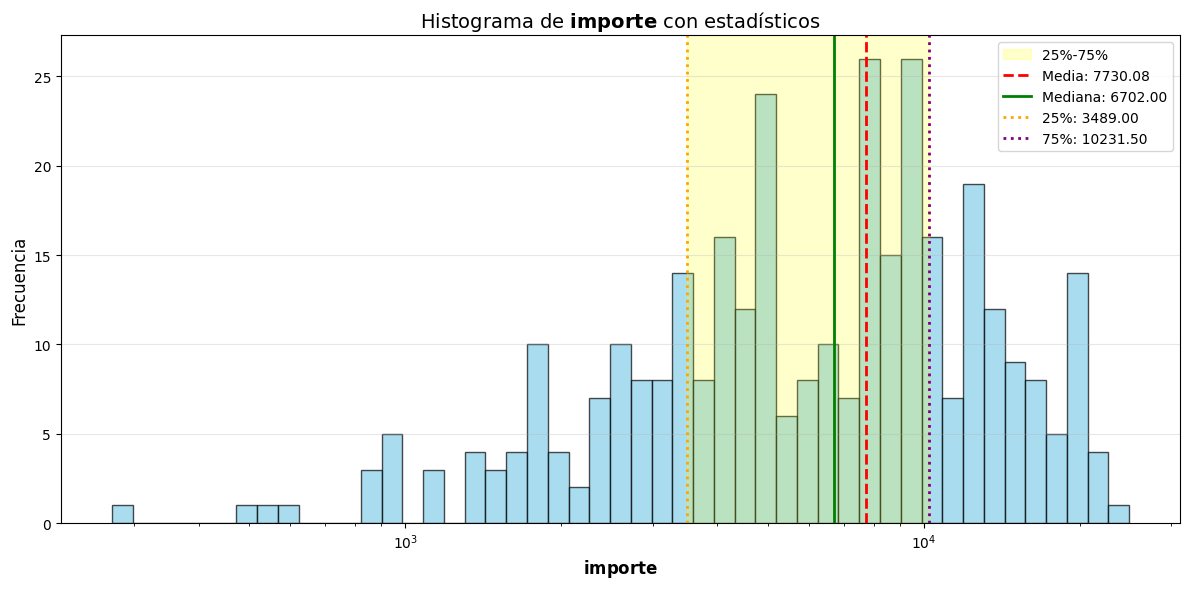

In [211]:
# Histograma de la columna "importe" con resumen estadístico extendido
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Lo que está evaluando
print('Lo que está evaluando: Histograma de la columna "importe" (original)')
print('Tipo de gráfico: Histograma en escala log con percentiles y estadísticas superpuestas')

# Datos
data_imp = df_detalle_ventas_True['importe'].dropna()

# Estadísticos básicos
media = data_imp.mean()
mediana = data_imp.median()
min_imp = data_imp.min()
max_imp = data_imp.max()
rango_imp = max_imp - min_imp
std_imp = data_imp.std()
var_imp = data_imp.var()
mad_imp = np.median(np.abs(data_imp - np.median(data_imp)))
n_imp = len(data_imp)
cv_imp = std_imp / media if media != 0 else np.nan
sem_imp = std_imp / np.sqrt(n_imp) if n_imp > 0 else np.nan
t_crit_imp = stats.t.ppf(0.975, df=n_imp-1) if n_imp > 1 else np.nan
ci_low_imp = media - t_crit_imp * sem_imp if n_imp > 1 else np.nan
ci_high_imp = media + t_crit_imp * sem_imp if n_imp > 1 else np.nan

# Percentiles
p25 = np.percentile(data_imp, 25)
p75 = np.percentile(data_imp, 75)

# Moda(s)
modas_imp = data_imp.mode().tolist()
n_modas_imp = len(modas_imp)

if n_modas_imp == 0:
    moda_imp_txt = 'Sin moda'
    clas_moda_imp = 'Sin moda definida'
else:
    moda_imp_txt = ', '.join(f'{m:,.2f}' for m in modas_imp)
    if n_modas_imp == 1:
        clas_moda_imp = 'Unimodal'
    elif n_modas_imp == 2:
        clas_moda_imp = 'Bimodal'
    else:
        clas_moda_imp = 'Multimodal'

# Asimetría y curtosis
skew_imp = data_imp.skew()
kurt_imp = data_imp.kurt()

# Clasificación de asimetría
if np.isnan(skew_imp):
    clas_asim_imp = 'No disponible'
elif abs(skew_imp) < 0.05:
    clas_asim_imp = 'Simétrica'
elif skew_imp > 0:
    clas_asim_imp = 'Asimétrica positiva'
else:
    clas_asim_imp = 'Asimétrica negativa'

# Clasificación de curtosis
if np.isnan(kurt_imp):
    clas_curt_imp = 'No disponible'
elif kurt_imp < -0.5:
    clas_curt_imp = 'Platicúrtica (cola ligera)'
elif kurt_imp > 0.5:
    clas_curt_imp = 'Leptocúrtica (cola pesada)'
else:
    clas_curt_imp = 'Mesocúrtica (similar a normal)'

# BLOQUE DE PRINT EXTENDIDO (ordenado y legible)
print('\n' + '=' * 100)
print('RESUMEN ESTADÍSTICO EXTENDIDO - IMPORTE')
print('=' * 100)

print(f'  Count (n observaciones)         : {n_imp:,}')
print(f'  Valor mínimo                    : {min_imp:,.2f}')
print(f'  Valor máximo                    : {max_imp:,.2f}')
print(f'  Rango                           : {rango_imp:,.2f}')
print(f'  Media                           : {media:,.2f}')
print(f'  Mediana                         : {mediana:,.2f}')
print(f'  Desvío estándar                 : {std_imp:,.2f}')
print(f'  Varianza                        : {var_imp:,.2f}')
print(f'  MAD (desvío absoluto mediano)   : {mad_imp:,.2f}')
print(f'  Coeficiente de variación (CV)   : {cv_imp:.4f}')
print(f'  Error estándar de la media (SEM): {sem_imp:.4f}')
print(f'  IC 95% para la media            : [{ci_low_imp:,.2f}, {ci_high_imp:,.2f}]')

print('\n  -- Moda')
print(f'     Moda(s)                      : {moda_imp_txt}')
print(f'     Cantidad de modas            : {n_modas_imp}')
print(f'     Clasificación de la moda     : {clas_moda_imp}')

print('\n  -- Medidas de forma')
print(f'     Asimetría (skewness)         : {skew_imp:,.4f}')
print(f'     Clasificación de asimetría   : {clas_asim_imp}')
print(f'     Curtosis                     : {kurt_imp:,.4f}')
print(f'     Clasificación de curtosis    : {clas_curt_imp}')

print('\n  -- Percentiles seleccionados')
for pp in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
    print(f'     {pp:>3d}%: {np.percentile(data_imp, pp):,.2f}')

print('\n' + '-' * 100)
print('Nota: Clasificación de asimetría y curtosis según umbrales simples.')
print('-' * 100 + '\n')

# Bins logarítmicos seguros (evita valores <=0)
min_pos = data_imp[data_imp > 0].min()
max_pos = data_imp.max()
if min_pos <= 0:
    min_pos = 1
bins_log = np.logspace(np.log10(min_pos), np.log10(max_pos), 50)

# Crear histograma
plt.figure(figsize=(12,6))
plt.hist(data_imp, bins=bins_log, color='skyblue', edgecolor='black', alpha=0.7)

# Escala logarítmica en X
plt.xscale('log')

# Sombreado entre percentiles 25 y 75
plt.axvspan(p25, p75, color='yellow', alpha=0.2, label='25%-75%')

# Líneas estadísticas
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(p25, color='orange', linestyle=':', linewidth=2, label=f'25%: {p25:.2f}')
plt.axvline(p75, color='purple', linestyle=':', linewidth=2, label=f'75%: {p75:.2f}')

# Etiquetas y título
plt.title(r'Histograma de $\mathbf{importe}$ con estadísticos', fontsize=14)
plt.xlabel(r'$\mathbf{importe}$', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



#### df_detalle_ventas_True no cambio aún, solo se **crea** la variable `importe_std`.

In [212]:
# Aplica StandardScaler con validación: verifica media ≈ 0 y std ≈ 1 tras transformación
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

print('\n--- Normalización: StandardScaler sobre importe ---')
print(f'Valores originales - Media: {df_detalle_ventas_True["importe"].mean():,.2f}, Std: {df_detalle_ventas_True["importe"].std():,.2f}')

scaler_standard = StandardScaler()
importe_std = scaler_standard.fit_transform(df_detalle_ventas_True[['importe']]).ravel()

# Validación post-estandarización
mean_after = importe_std.mean()
std_after = importe_std.std()
print(f'Valores normalizados - Media: {mean_after:.6f}, Std: {std_after:.6f}')
assert abs(mean_after) < 1e-10, f'Media debe ser ≈0, obtuvo {mean_after}'
assert abs(std_after - 1.0) < 1e-10, f'Std debe ser ≈1, obtuvo {std_after}'
print('✓ Validación OK: StandardScaler aplicado correctamente')



--- Normalización: StandardScaler sobre importe ---
Valores originales - Media: 7,730.08, Std: 5,265.54
Valores normalizados - Media: 0.000000, Std: 1.000000
✓ Validación OK: StandardScaler aplicado correctamente


#### **Incorporo** la columna **normalizada** 'importe_std' al dataset preparado

In [213]:
# Incorpora la columna normalizada 'importe_std' al dataset preparado
df_detalle_ventas_True['importe_std'] = importe_std

print('Columna "importe_std" incorporada a df_detalle_ventas_True.')
print(f'Dimensiones actuales del dataframe: {df_detalle_ventas_True.shape[0]:,} filas x {df_detalle_ventas_True.shape[1]:,} columnas')


Columna "importe_std" incorporada a df_detalle_ventas_True.
Dimensiones actuales del dataframe: 343 filas x 6 columnas


#### Verificación de `importe_std` en el dataframe

In [214]:
# Confirma la incorporación de 'importe_std' y revisa su escala centrada

print('\n--- Verificación post-normalización (primeras 5 filas) ---')
print(df_detalle_ventas_True[['importe', 'importe_std']].head(5))

print('\n--- Estadísticos rápidos de importe_std ---')
print(f'  Mínimo       : {df_detalle_ventas_True["importe_std"].min():.4f}')
print(f'  Máximo       : {df_detalle_ventas_True["importe_std"].max():.4f}')
print(f'  Media        : {df_detalle_ventas_True["importe_std"].mean():.4f}')
print(f'  Desvío std   : {df_detalle_ventas_True["importe_std"].std():.4f}')



--- Verificación post-normalización (primeras 5 filas) ---
   importe  importe_std
0   2902.0    -0.918259
1  11970.0     0.806396
2   2345.0    -1.024196
3   8122.0     0.074540
4   2069.0    -1.076688

--- Estadísticos rápidos de importe_std ---
  Mínimo       : -1.4185
  Máximo       : 3.2589
  Media        : 0.0000
  Desvío std   : 1.0015


#### 📊 Histograma de **`importe_std`**
**Tipo de gráfico:** Histograma (rango fijo)  
**Cómo:** Visualizar la distribución del importe estandarizado (`importe_std`) y marcar percentiles para evaluar simetría.  
**Por qué:** Confirmar que la estandarización no altera la forma de la distribución y mostrar la dispersión en unidades de desviación estándar.

Lo que está evaluando: Histograma de la columna "importe_std" (Puntaje Z)
Tipo de gráfico: Histograma con rango centrado y percentiles

RESUMEN ESTADÍSTICO EXTENDIDO - IMPORTE_STD (PUNTAJE Z)
  Count (n observaciones)         : 343
  Valor mínimo                    : -1.418462
  Valor máximo                    : 3.258914
  Rango                           : 4.677377
  Media                           : 0.000000
  Mediana                         : -0.195532
  Desvío estándar                 : 1.001461
  Varianza                        : 1.002924
  MAD (desvío absoluto mediano)   : 0.636380
  Coeficiente de variación (CV)   : 38674785193884416.000000
  Error estándar de la media (SEM): 0.054074
  IC 95% para la media            : [-0.106359, 0.106359]

  -- Moda
     Moda(s)                      : -0.6267, -0.5664
     Cantidad de modas            : 2
     Clasificación de la moda     : Bimodal

  -- Medidas de forma
     Asimetría (skewness)         : 0.8745
     Clasificación de asimetrí

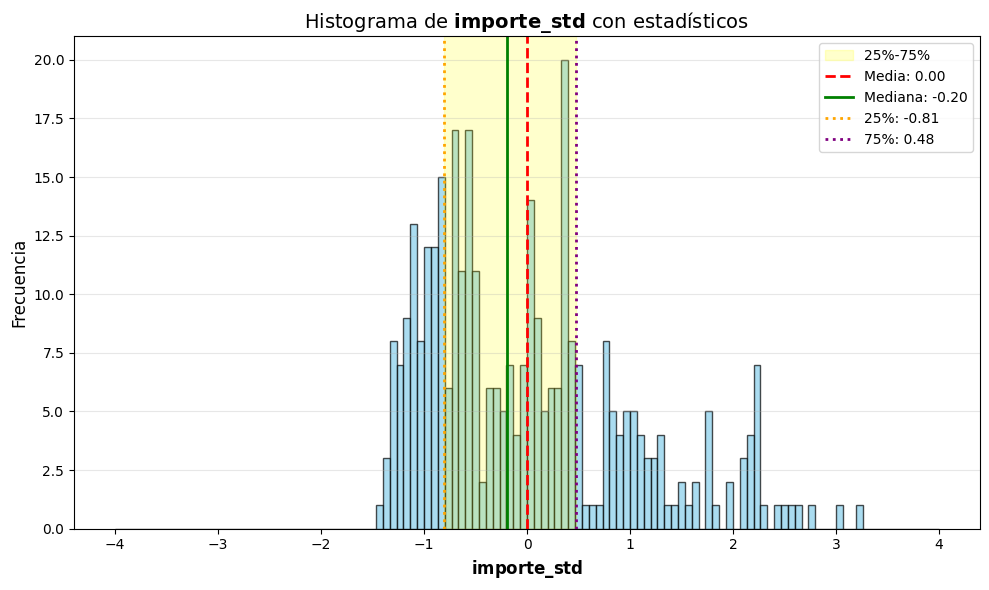

In [215]:
# Histograma de la columna "importe_std" (Puntaje Z) con resumen estadístico extendido
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Lo que está evaluando
print('Lo que está evaluando: Histograma de la columna "importe_std" (Puntaje Z)')
print('Tipo de gráfico: Histograma con rango centrado y percentiles')

# Serie estandarizada a graficar (obtiene la serie de forma segura)
if 'importe_std' in df_detalle_ventas_True.columns:
    data_std = df_detalle_ventas_True['importe_std'].dropna()
else:
    try:
        # intenta usar la variable local `importe_std` si existe
        data_std = pd.Series(importe_std).dropna()
    except Exception:
        # si no existe, recalcula usando el scaler (si está disponible)
        try:
            data_std = pd.Series(scaler_standard.transform(df_detalle_ventas_True[['importe']]).ravel()).dropna()
        except Exception:
            raise RuntimeError('No se encontró `importe_std` ni `scaler_standard` para recomputar. Ejecutar la celda de estandarización primero.')

# ===========================
# ESTADÍSTICOS AMPLIADOS
# ===========================
media = data_std.mean()
mediana = data_std.median()
min_std = data_std.min()
max_std = data_std.max()
rango_std = max_std - min_std
n_std = len(data_std)

std_std = data_std.std()
var_std = data_std.var()
mad_std = np.median(np.abs(data_std - np.median(data_std)))
cv_std = std_std / media if media != 0 else np.nan
sem_std = std_std / np.sqrt(n_std) if n_std > 0 else np.nan
t_crit_std = stats.t.ppf(0.975, df=n_std-1) if n_std > 1 else np.nan
ci_low_std = media - t_crit_std * sem_std if n_std > 1 else np.nan
ci_high_std = media + t_crit_std * sem_std if n_std > 1 else np.nan

# Percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
p_dict = {pp: np.percentile(data_std, pp) for pp in percentiles}
p25 = p_dict[25]
p75 = p_dict[75]

# Moda(s)
modas_std = data_std.mode().tolist()
n_modas_std = len(modas_std)

if n_modas_std == 0:
    moda_std_txt = 'Sin moda'
    clas_moda_std = 'Sin moda definida'
else:
    moda_std_txt = ', '.join(f'{m:.4f}' for m in modas_std)
    if n_modas_std == 1:
        clas_moda_std = 'Unimodal'
    elif n_modas_std == 2:
        clas_moda_std = 'Bimodal'
    else:
        clas_moda_std = 'Multimodal'

# Asimetría y curtosis
skew_std = data_std.skew()
kurt_std = data_std.kurt()

# Clasificación de asimetría
if np.isnan(skew_std):
    clas_asim_std = 'No disponible'
elif abs(skew_std) < 0.05:
    clas_asim_std = 'Simétrica'
elif skew_std > 0:
    clas_asim_std = 'Asimétrica positiva'
else:
    clas_asim_std = 'Asimétrica negativa'

# Clasificación de curtosis
if np.isnan(kurt_std):
    clas_curt_std = 'No disponible'
elif kurt_std < -0.5:
    clas_curt_std = 'Platicúrtica (cola ligera)'
elif kurt_std > 0.5:
    clas_curt_std = 'Leptocúrtica (cola pesada)'
else:
    clas_curt_std = 'Mesocúrtica (similar a normal)'

# BLOQUE DE PRINT EXTENDIDO (ordenado y legible)
print('\n' + '=' * 100)
print('RESUMEN ESTADÍSTICO EXTENDIDO - IMPORTE_STD (PUNTAJE Z)')
print('=' * 100)

print(f'  Count (n observaciones)         : {n_std:,}')
print(f'  Valor mínimo                    : {min_std:.6f}')
print(f'  Valor máximo                    : {max_std:.6f}')
print(f'  Rango                           : {rango_std:.6f}')
print(f'  Media                           : {media:.6f}')
print(f'  Mediana                         : {mediana:.6f}')
print(f'  Desvío estándar                 : {std_std:.6f}')
print(f'  Varianza                        : {var_std:.6f}')
print(f'  MAD (desvío absoluto mediano)   : {mad_std:.6f}')
print(f'  Coeficiente de variación (CV)   : {cv_std:.6f}')
print(f'  Error estándar de la media (SEM): {sem_std:.6f}')
print(f'  IC 95% para la media            : [{ci_low_std:.6f}, {ci_high_std:.6f}]')

print('\n  -- Moda')
print(f'     Moda(s)                      : {moda_std_txt}')
print(f'     Cantidad de modas            : {n_modas_std}')
print(f'     Clasificación de la moda     : {clas_moda_std}')

print('\n  -- Medidas de forma')
print(f'     Asimetría (skewness)         : {skew_std:,.4f}')
print(f'     Clasificación de asimetría   : {clas_asim_std}')
print(f'     Curtosis                     : {kurt_std:,.4f}')
print(f'     Clasificación de curtosis    : {clas_curt_std}')

print('\n  -- Percentiles seleccionados')
for pp in percentiles:
    print(f'     {pp:>3d}%: {p_dict[pp]:.6f}')

print('\n' + '-' * 100)
print('Nota: "importe_std" es un puntaje Z; idealmente Media≈0 y Std≈1 en una estandarización perfecta.')
print('-' * 100 + '\n')

# ===========================
# HISTOGRAMA
# ===========================
# Calcula estadísticos relevantes para resaltar en el gráfico
# (reutilizando media, mediana, p25, p75 ya calculados)
plt.figure(figsize=(10,6))
plt.hist(data_std, bins=120, range=(-4,4), color='skyblue', edgecolor='black', alpha=0.7)

# Destaca la banda intercuartílica sobre el histograma
plt.axvspan(p25, p75, color='yellow', alpha=0.2, label='25%-75%')

# Añade marcadores estadísticos clave
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(p25, color='orange', linestyle=':', linewidth=2, label=f'25%: {p25:.2f}')
plt.axvline(p75, color='purple', linestyle=':', linewidth=2, label=f'75%: {p75:.2f}')

# Configura títulos, etiquetas y cuadrícula
plt.title(r'Histograma de $\mathbf{importe\_std}$ con estadísticos', fontsize=14)
plt.xlabel(r'$\mathbf{importe\_std}$', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [216]:
# Verifica las primeras filas antes de anexar la columna escalada al dataframe
df_detalle_ventas_True.head(3)  # La columna 'importe_std' aún no forma parte del DataFrame


,id_venta,id_producto,cantidad,precio_unitario,importe,importe_std
0,1,90,1,2902.0,2902.0,-0.918259
1,2,82,5,2394.0,11970.0,0.806396
2,2,39,5,469.0,2345.0,-1.024196


In [217]:
# Confirma la incorporación de 'importe_std' y revisa su escala centrada
df_detalle_ventas_True['importe_std'] = importe_std
print('\n--- Verificación post-normalización (primeras 5 filas) ---')
print(df_detalle_ventas_True[['importe', 'importe_std']].head(5))
print(f'\nRango de importe_std: [{importe_std.min():.4f}, {importe_std.max():.4f}]')



--- Verificación post-normalización (primeras 5 filas) ---
   importe  importe_std
0   2902.0    -0.918259
1  11970.0     0.806396
2   2345.0    -1.024196
3   8122.0     0.074540
4   2069.0    -1.076688

Rango de importe_std: [-1.4185, 3.2589]


### 🔍 Detección Precisa de Outliers (Método IQR)

In [218]:
import pandas as pd
import numpy as np

print('\n' + '='*90)
print('ANÁLISIS DE OUTLIERS - MÉTODO IQR (Rango Intercuartílico)')
print('='*90)

# Variables numéricas a analizar
cols_numeric = ['cantidad', 'importe', 'precio_unitario', 'importe_std']

for col in cols_numeric:
    if col not in df_detalle_ventas_True.columns:
        continue
    
    s = df_detalle_ventas_True[col]
    print(f'\n--- Análisis para [{col}] ---')
    
    # Calcula cuartiles e IQR
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    print(f'Q1 (25%): {q1:,.2f}')
    print(f'Q3 (75%): {q3:,.2f}')
    print(f'IQR: {iqr:,.2f}')
    print(f'Límite Inferior: Q1 - 1.5×IQR = {lower_bound:,.2f}')
    print(f'Límite Superior: Q3 + 1.5×IQR = {upper_bound:,.2f}')
    
    # Detección de outliers
    outliers_mask = (s < lower_bound) | (s > upper_bound)
    n_outliers = outliers_mask.sum()
    pct_outliers = (n_outliers / len(s)) * 100
    
    print(f'\nOutliers IQR: {n_outliers} ({pct_outliers:.2f}%)')
    
    if n_outliers > 0:
        outlier_vals = s[outliers_mask].sort_values(ascending=False)
        print(f'\n  Top 10 outliers más extremos:')
        for idx, (i, val) in enumerate(outlier_vals.head(10).items(), 1):
            print(f"    {idx}. Índice {i}: {val:,.2f}")
        # Comparativa outliers vs rango (media/mediana)
        mean_out = outlier_vals.mean() if len(outlier_vals)>0 else np.nan
        median_out = outlier_vals.median() if len(outlier_vals)>0 else np.nan
        non_out = s[~outliers_mask]
        mean_in = non_out.mean() if len(non_out)>0 else np.nan
        median_in = non_out.median() if len(non_out)>0 else np.nan
        print(f'\n  Media outliers: {mean_out:,.2f} | Mediana outliers: {median_out:,.2f}')
        print(f'  Media resto: {mean_in:,.2f} | Mediana resto: {median_in:,.2f}')
    
    print(f'\nValores en rango [{lower_bound:,.2f}, {upper_bound:,.2f}]: {(~outliers_mask).sum()} ({100-pct_outliers:.2f}%)')



ANÁLISIS DE OUTLIERS - MÉTODO IQR (Rango Intercuartílico)

--- Análisis para [cantidad] ---
Q1 (25%): 2.00
Q3 (75%): 4.00
IQR: 2.00
Límite Inferior: Q1 - 1.5×IQR = -1.00
Límite Superior: Q3 + 1.5×IQR = 7.00

Outliers IQR: 0 (0.00%)

Valores en rango [-1.00, 7.00]: 343 (100.00%)

--- Análisis para [importe] ---
Q1 (25%): 3,489.00
Q3 (75%): 10,231.50
IQR: 6,742.50
Límite Inferior: Q1 - 1.5×IQR = -6,624.75
Límite Superior: Q3 + 1.5×IQR = 20,345.25

Outliers IQR: 7 (2.04%)

  Top 10 outliers más extremos:
    1. Índice 208: 24,865.00
    2. Índice 141: 23,760.00
    3. Índice 41: 22,150.00
    4. Índice 54: 21,430.00
    5. Índice 175: 21,090.00
    6. Índice 308: 20,850.00
    7. Índice 260: 20,450.00

  Media outliers: 22,085.00 | Mediana outliers: 21,430.00
  Media resto: 7,431.02 | Mediana resto: 6,541.00

Valores en rango [-6,624.75, 20,345.25]: 336 (97.96%)

--- Análisis para [precio_unitario] ---
Q1 (25%): 1,618.50
Q3 (75%): 3,876.00
IQR: 2,257.50
Límite Inferior: Q1 - 1.5×IQR = -1

#### 📊 Distribución de **`cantidad`**
**Tipo de gráfico:** Histograma  
**Cómo:** Se utiliza un histograma para visualizar la frecuencia de las cantidades de productos por transacción.  
**Por qué:** Comprender la distribución de cantidades es estratégico para identificar si la mayoría de compras son unitarias o en volumen, y detectar patrones de compra atípicos (outliers en cantidad).

Lo que está evaluando: Distribución de la columna "cantidad" (unidades por línea de venta)
Tipo de gráfico: Histograma con percentiles y estadísticos superpuestos

RESUMEN ESTADÍSTICO EXTENDIDO - CANTIDAD
  Count (n observaciones)         : 343
  Valor mínimo                    : 1
  Valor máximo                    : 5
  Rango                           : 4
  Media                           : 2.9621
  Mediana                         : 3.0000
  Desvío estándar                 : 1.3664
  Varianza                        : 1.8670
  MAD (desvío absoluto mediano)   : 1.0000
  Coeficiente de variación (CV)   : 0.4613
  Error estándar de la media (SEM): 0.0738
  IC 95% para la media            : [2.8170, 3.1072]

  -- Moda
     Moda(s)                      : 2
     Cantidad de modas            : 1
     Clasificación de la moda     : Unimodal

  -- Medidas de forma
     Asimetría (skewness)         : 0.0618
     Clasificación de asimetría   : Asimétrica positiva
     Curtosis                    

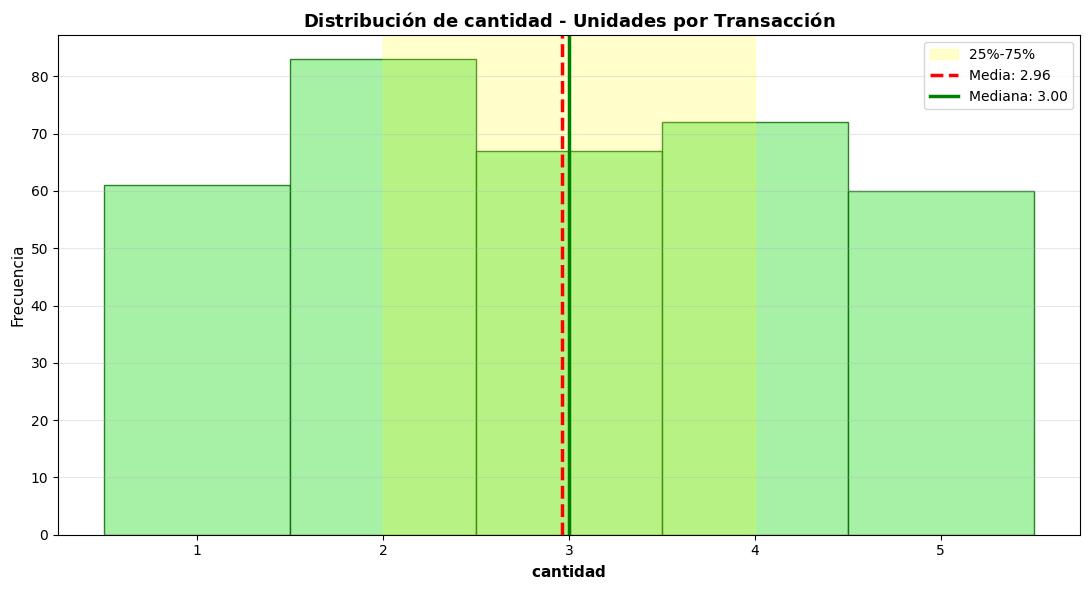

In [219]:
# Histograma de la columna "cantidad" con resumen estadístico extendido
import matplotlib.pyplot as plt
import numpy as np

# Lo que está evaluando
print('Lo que está evaluando: Distribución de la columna "cantidad" (unidades por línea de venta)')
print('Tipo de gráfico: Histograma con percentiles y estadísticos superpuestos')

# Datos
data_qty = df_detalle_ventas_True['cantidad'].dropna()

# Estadísticos básicos
media = data_qty.mean()
mediana = data_qty.median()
min_qty = data_qty.min()
max_qty = data_qty.max()
rango_qty = max_qty - min_qty
std = data_qty.std()
skew = data_qty.skew()
n_qty = len(data_qty)

var_qty = data_qty.var()
mad_qty = np.median(np.abs(data_qty - np.median(data_qty)))
cv_qty = std / media if media != 0 else np.nan
sem_qty = std / np.sqrt(n_qty) if n_qty > 0 else np.nan
t_crit_qty = stats.t.ppf(0.975, df=n_qty-1) if n_qty > 1 else np.nan
ci_low_qty = media - t_crit_qty * sem_qty if n_qty > 1 else np.nan
ci_high_qty = media + t_crit_qty * sem_qty if n_qty > 1 else np.nan

# Percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
p_dict = {pp: np.percentile(data_qty, pp) for pp in percentiles}
p25 = p_dict[25]
p75 = p_dict[75]

# Moda(s)
modas_qty = data_qty.mode().tolist()
n_modas_qty = len(modas_qty)

if n_modas_qty == 0:
    moda_qty_txt = 'Sin moda'
    clas_moda_qty = 'Sin moda definida'
else:
    moda_qty_txt = ', '.join(f'{m:.0f}' for m in modas_qty)
    if n_modas_qty == 1:
        clas_moda_qty = 'Unimodal'
    elif n_modas_qty == 2:
        clas_moda_qty = 'Bimodal'
    else:
        clas_moda_qty = 'Multimodal'

# Asimetría y curtosis
skew_qty = data_qty.skew()
kurt_qty = data_qty.kurt()

# Clasificación de asimetría
if np.isnan(skew_qty):
    clas_asim_qty = 'No disponible'
elif abs(skew_qty) < 0.05:
    clas_asim_qty = 'Simétrica'
elif skew_qty > 0:
    clas_asim_qty = 'Asimétrica positiva'
else:
    clas_asim_qty = 'Asimétrica negativa'

# Clasificación de curtosis
if np.isnan(kurt_qty):
    clas_curt_qty = 'No disponible'
elif kurt_qty < -0.5:
    clas_curt_qty = 'Platicúrtica (cola ligera)'
elif kurt_qty > 0.5:
    clas_curt_qty = 'Leptocúrtica (cola pesada)'
else:
    clas_curt_qty = 'Mesocúrtica (similar a normal)'

# BLOQUE DE PRINT EXTENDIDO (ordenado y legible)
print('\n' + '=' * 100)
print('RESUMEN ESTADÍSTICO EXTENDIDO - CANTIDAD')
print('=' * 100)

print(f'  Count (n observaciones)         : {n_qty:,}')
print(f'  Valor mínimo                    : {min_qty:.0f}')
print(f'  Valor máximo                    : {max_qty:.0f}')
print(f'  Rango                           : {rango_qty:.0f}')
print(f'  Media                           : {media:.4f}')
print(f'  Mediana                         : {mediana:.4f}')
print(f'  Desvío estándar                 : {std:.4f}')
print(f'  Varianza                        : {var_qty:.4f}')
print(f'  MAD (desvío absoluto mediano)   : {mad_qty:.4f}')
print(f'  Coeficiente de variación (CV)   : {cv_qty:.4f}')
print(f'  Error estándar de la media (SEM): {sem_qty:.4f}')
print(f'  IC 95% para la media            : [{ci_low_qty:.4f}, {ci_high_qty:.4f}]')

print('\n  -- Moda')
print(f'     Moda(s)                      : {moda_qty_txt}')
print(f'     Cantidad de modas            : {n_modas_qty}')
print(f'     Clasificación de la moda     : {clas_moda_qty}')

print('\n  -- Medidas de forma')
print(f'     Asimetría (skewness)         : {skew_qty:,.4f}')
print(f'     Clasificación de asimetría   : {clas_asim_qty}')
print(f'     Curtosis                     : {kurt_qty:,.4f}')
print(f'     Clasificación de curtosis    : {clas_curt_qty}')

print('\n  -- Percentiles seleccionados')
for pp in percentiles:
    print(f'     {pp:>3d}%: {p_dict[pp]:.0f}')

print('\n' + '-' * 100)
print('Nota: "cantidad" representa unidades por línea de venta; revisar cola derecha para grandes cantidades.')
print('-' * 100 + '\n')

# Histograma
plt.figure(figsize=(11, 6))
plt.hist(
    data_qty,
    bins=np.arange(data_qty.min(), data_qty.max() + 2) - 0.5,
    color='lightgreen',
    edgecolor='darkgreen',
    alpha=0.8
)

# Sombreado intercuartílico
plt.axvspan(p25, p75, color='yellow', alpha=0.2, label='25%-75%')

# Líneas estadísticas
plt.axvline(media, color='red', linestyle='--', linewidth=2.5, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2.5, label=f'Mediana: {mediana:.2f}')

# Etiquetas y título
plt.title(r'Distribución de $\mathbf{cantidad}$ - Unidades por Transacción', fontsize=13, fontweight='bold')
plt.xlabel(r'$\mathbf{cantidad}$', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



💡 **Conclusión:** La distribución de cantidad revela el patrón típico de compra de la base de clientes. Un análisis de los valores atípicos (outliers) permite identificar clientes o transacciones anómalas que compran en volúmenes significativamente distintos al promedio.

#### 📈 Relación Bivariada: **`cantidad`** vs **`importe`**
**Tipo de gráfico:** Scatter plot  
**Cómo:** Se grafica cada transacción como un punto en el plano (cantidad, importe), permitiendo visualizar la correlación.  
**Por qué:** Verificar si existe una relación lineal entre cantidad e importe (es decir, si comprar más unidades implica un importe proporcionalmente mayor), y detectar puntos atípicos que se desvíen de esta relación.

Lo que está evaluando: Relación entre cantidad e importe en cada transacción
Tipo de gráfico: Scatter plot con línea de regresión
Resumen estadístico estratégico:
  Correlación Pearson: 0.5997 | Spearman: 0.6107 (p=1.94e-36)
  Covariance: 4,314.83
  Cantidad: Media=2.96, Std=1.37
  Importe: Media=7,730.08, Std=5,265.54
  Regresión: importe = 884.28 + 2,311.13 × cantidad
  R² = 0.3597, p-value = 7.03e-35 | Std_err slope: 166.9932


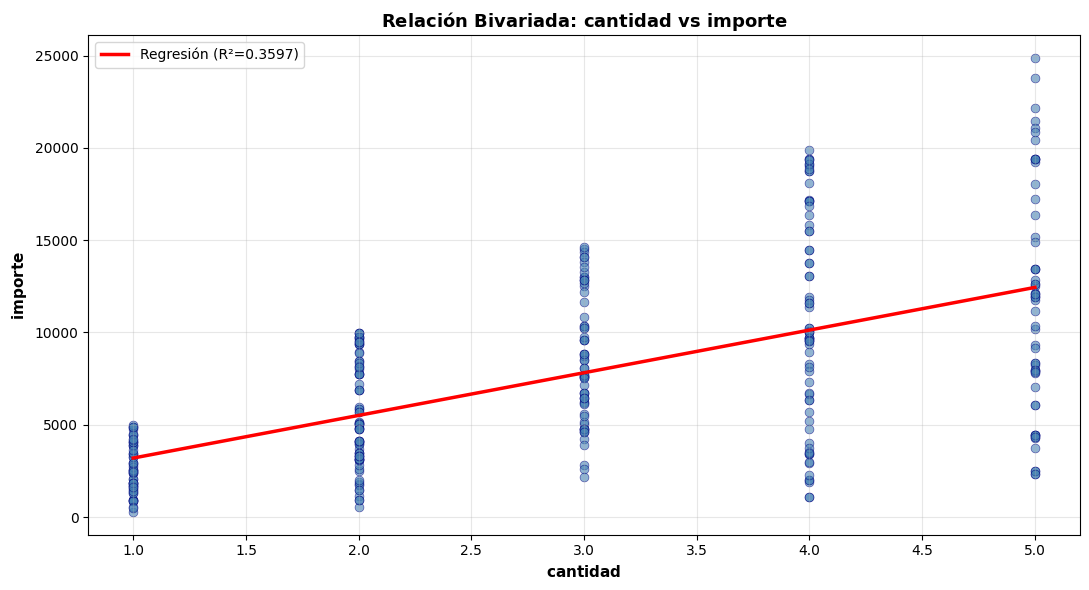

In [220]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Lo que está evaluando
print('Lo que está evaluando: Relación entre cantidad e importe en cada transacción')
print('Tipo de gráfico: Scatter plot con línea de regresión')

# Datos
qty = df_detalle_ventas_True['cantidad']
imp = df_detalle_ventas_True['importe']

# Correlación
corr = qty.corr(imp)
from scipy.stats import spearmanr
spearman_corr, spearman_p = spearmanr(qty, imp)
cov_qi = np.cov(qty, imp)[0,1]
print(f'Resumen estadístico estratégico:')
print(f'  Correlación Pearson: {corr:.4f} | Spearman: {spearman_corr:.4f} (p={spearman_p:.2e})')
print(f'  Covariance: {cov_qi:,.2f}')
print(f'  Cantidad: Media={qty.mean():.2f}, Std={qty.std():.2f}')
print(f'  Importe: Media={imp.mean():,.2f}, Std={imp.std():,.2f}')

# Regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(qty, imp)
print(f'  Regresión: importe = {intercept:,.2f} + {slope:,.2f} × cantidad')
print(f'  R² = {r_value**2:.4f}, p-value = {p_value:.2e} | Std_err slope: {std_err:.4f}')

# Scatter
plt.figure(figsize=(11, 6))
plt.scatter(qty, imp, alpha=0.6, s=40, color='steelblue', edgecolors='navy', linewidth=0.5)

# Línea de regresión
x_line = np.array([qty.min(), qty.max()])
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2.5, label=f'Regresión (R²={r_value**2:.4f})')

# Etiquetas
plt.title(r'Relación Bivariada: $\mathbf{cantidad}$ vs $\mathbf{importe}$', fontsize=13, fontweight='bold')
plt.xlabel(r'$\mathbf{cantidad}$', fontsize=11)
plt.ylabel(r'$\mathbf{importe}$', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


💡 **Conclusión:** Si la correlación es alta y positiva (próxima a +1), indica que la mayoría de transacciones siguen un patrón consistente donde más cantidad = mayor importe. Los puntos alejados de la línea de regresión representan precios/descuentos atípicos por unidad.

#### 📊 Boxplot Comparativo: **`importe`** (original vs log1p)
**Tipo de gráfico:** Boxplot (dos paneles)  
**Cómo:** Se visualiza la distribución de importe sin transformación (izquierda) y con transformación logarítmica (derecha).  
**Por qué:** Verificar cómo la transformación log1p comprime la cola superior (outliers), útil para aplicar luego modelos que asumen normalidad.

Lo que está evaluando: Efecto de la transformación log1p en la compresión de outliers en "importe"
Tipo de gráfico: Boxplot comparativo (antes y después)
Resumen estadístico estratégico:
  Importe original: Mean=7,730.08, Std=5,265.54, Var=27,725,943.89, Skew=0.8745
   MAD=3,346.00 | CV=0.6812 | SEM=284.3126 | 95% CI mean: [7,170.86, 8,289.30]
  Importe log1p: Mean=8.68, Std=0.81, Var=0.66, Skew=-0.6692
   MAD=0.55 | CV=0.0934 | SEM=0.0438 | 95% CI mean: [8.59, 8.77]


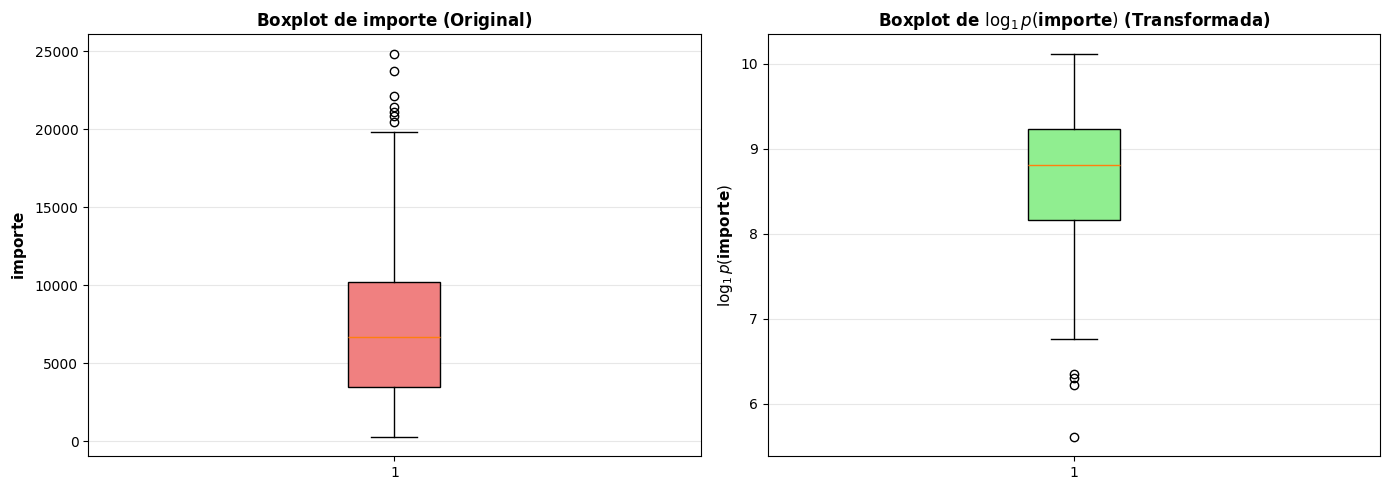

In [221]:
import matplotlib.pyplot as plt
import numpy as np

# Lo que está evaluando
print('Lo que está evaluando: Efecto de la transformación log1p en la compresión de outliers en "importe"')
print('Tipo de gráfico: Boxplot comparativo (antes y después)')

# Datos
importe_orig = df_detalle_ventas_True['importe']
importe_log = np.log1p(importe_orig)

# Estadísticos
print(f'Resumen estadístico estratégico:')
mean_orig = importe_orig.mean()
std_orig = importe_orig.std()
var_orig = importe_orig.var()
mad_orig = np.median(np.abs(importe_orig - np.median(importe_orig)))
cv_orig = std_orig / mean_orig if mean_orig != 0 else np.nan
sem_orig = std_orig / np.sqrt(len(importe_orig)) if len(importe_orig)>0 else np.nan
t_crit_o = stats.t.ppf(0.975, df=len(importe_orig)-1) if len(importe_orig)>1 else np.nan
ci_low_o = mean_orig - t_crit_o * sem_orig if len(importe_orig)>1 else np.nan
ci_high_o = mean_orig + t_crit_o * sem_orig if len(importe_orig)>1 else np.nan
print(f'  Importe original: Mean={mean_orig:,.2f}, Std={std_orig:,.2f}, Var={var_orig:,.2f}, Skew={importe_orig.skew():.4f}')
print(f'   MAD={mad_orig:,.2f} | CV={cv_orig:.4f} | SEM={sem_orig:.4f} | 95% CI mean: [{ci_low_o:,.2f}, {ci_high_o:,.2f}]')
mean_log = importe_log.mean()
std_log = importe_log.std()
var_log = importe_log.var()
mad_log = np.median(np.abs(importe_log - np.median(importe_log)))
cv_log = std_log / mean_log if mean_log != 0 else np.nan
sem_log = std_log / np.sqrt(len(importe_log)) if len(importe_log)>0 else np.nan
t_crit_l = stats.t.ppf(0.975, df=len(importe_log)-1) if len(importe_log)>1 else np.nan
ci_low_l = mean_log - t_crit_l * sem_log if len(importe_log)>1 else np.nan
ci_high_l = mean_log + t_crit_l * sem_log if len(importe_log)>1 else np.nan
print(f'  Importe log1p: Mean={mean_log:.2f}, Std={std_log:.2f}, Var={var_log:.2f}, Skew={importe_log.skew():.4f}')
print(f'   MAD={mad_log:.2f} | CV={cv_log:.4f} | SEM={sem_log:.4f} | 95% CI mean: [{ci_low_l:.2f}, {ci_high_l:.2f}]')

# Boxplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Original
bp1 = ax1.boxplot(importe_orig, vert=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightcoral')
ax1.set_ylabel(r'$\mathbf{importe}$', fontsize=11)
ax1.set_title(r'Boxplot de $\mathbf{importe}$ (Original)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Log1p
bp2 = ax2.boxplot(importe_log, vert=True, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightgreen')
ax2.set_ylabel(r'$\log_1p(\mathbf{importe})$', fontsize=11)
ax2.set_title(r'Boxplot de $\log_1p(\mathbf{importe})$ (Transformada)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


💡 **Conclusión:** La transformación logarítmica comprime la cola superior y reduce la asimetría. Esto es especialmente valioso cuando se planee aplicar modelos de regresión, ya que log1p mitiga el efecto de outliers financieros sin eliminarlos del dataset.

#### 📊 Top 10 Productos por Cantidad Total
**Tipo de gráfico:** Gráfico de barras horizontales  
**Cómo:** Se agrupa por id_producto, suma la cantidad total y se grafican los 10 productos con mayor volumen.  
**Por qué:** Identificar los productos más vendidos (en unidades) es clave para la gestión de inventario, promociones y estrategia comercial.

Lo que está evaluando: Productos más vendidos por volumen total de unidades
Tipo de gráfico: Gráfico de barras horizontales
Resumen estadístico estratégico:
  Total productos únicos: 95
  Cantidad total vendida: 1,016
  Top 10 productos concentran: 224 unidades (22.0% del total)
  Descripción estadística del Top 10 (suma por producto):
count    10.000000
mean     22.400000
std       2.458545
min      20.000000
25%      21.000000
50%      21.500000
75%      23.500000
max      27.000000


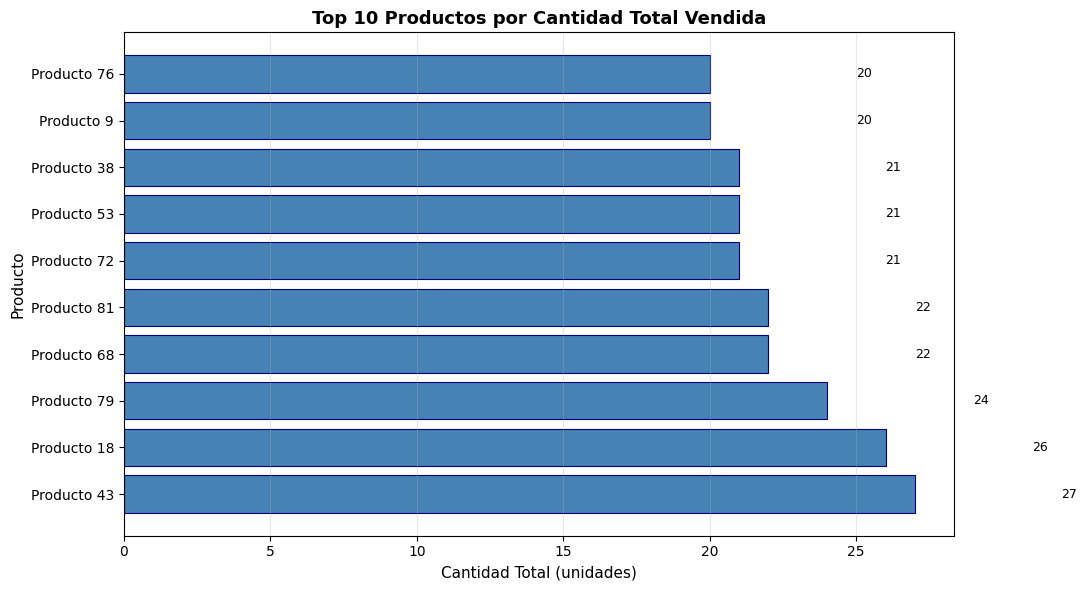

In [222]:
import matplotlib.pyplot as plt
import pandas as pd

# Lo que está evaluando
print('Lo que está evaluando: Productos más vendidos por volumen total de unidades')
print('Tipo de gráfico: Gráfico de barras horizontales')

# Agrupación por producto
product_qty = df_detalle_ventas_True.groupby('id_producto')['cantidad'].sum().sort_values(ascending=False)
top_10 = product_qty.head(10)

# Estadísticos
print(f'Resumen estadístico estratégico:')
print(f'  Total productos únicos: {len(product_qty)}')
print(f'  Cantidad total vendida: {df_detalle_ventas_True["cantidad"].sum():,}')
print(f'  Top 10 productos concentran: {top_10.sum():,} unidades ({top_10.sum()/df_detalle_ventas_True["cantidad"].sum()*100:.1f}% del total)')
# Estadísticas de la distribución de cantidades por producto (top10)
print('  Descripción estadística del Top 10 (suma por producto):')
print(top_10.describe().to_string())

# Gráfico de barras horizontal
plt.figure(figsize=(11, 6))
bars = plt.barh(range(len(top_10)), top_10.values, color='steelblue', edgecolor='navy', linewidth=0.8)

# Etiquetas
plt.yticks(range(len(top_10)), [f'Producto {pid}' for pid in top_10.index])
plt.xlabel('Cantidad Total (unidades)', fontsize=11)
plt.ylabel('Producto', fontsize=11)
plt.title('Top 10 Productos por Cantidad Total Vendida', fontsize=13, fontweight='bold')

# Valores en las barras
for i, (idx, val) in enumerate(top_10.items()):
    plt.text(val + 5, i, f'{int(val):,}', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


💡 **Conclusión:** La concentración de ventas en un pequeño número de productos sugiere oportunidades para marketing diferenciado, gestión de stock optimizada, y análisis de rentabilidad por producto.